Now that we have  optimized our models of choice, Logistic Regression and Random Forest, we will evaluate each them for predictive features and their peroformance on twitter dataset for Toronto on which we performed Topic modelling. 

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 0) #To display entire text content of a column
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics import precision_score, recall_score, f1_score
import timeit
import os
import pickle
import joblib as joblib
import re
from functools import reduce
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import functions #Custom functions that I created

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anuroop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Load Vectorized 150K Train and test data
X_train = pd.read_csv('D:\capstone_data\processed_csv\master_data_clean_sent140_cmplnts_mixed\X_train_clean_transformed.csv')
y_train = pd.read_csv('D:\capstone_data\processed_csv\master_data_clean_sent140_cmplnts_mixed\y_train.csv',
                     header = None)
X_test = pd.read_csv('D:\capstone_data\processed_csv\master_data_clean_sent140_cmplnts_mixed\X_test_clean_transformed.csv')
y_test = pd.read_csv('D:\capstone_data\processed_csv\master_data_clean_sent140_cmplnts_mixed\y_test.csv',
                    header = None)


In [3]:
#Convert target variables from column vectors to series
y_train = y_train[0]
y_test = y_test[0]

In [4]:
#Verify shapes
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(120398, 654)

(120398,)

(30100, 654)

(30100,)

In [5]:
#Load optimized grid for each model
optimized_log_reg_grid = joblib.load('D:\\capstone_data\\trained_models\\optimized_log_reg_grid_recall.pkl')
optimized_rand_forest_grid = joblib.load('D:\\capstone_data\\trained_models\\optimized_rand_forest_grid_recall.pkl')

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.1 when usin

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

## Optimized log reg classification report on test set
It must be noted here that since each grid was optimized on `recall`, using the default `.score` method will output `recall_score` rather than accuracy and hence we must look at classification report to look at all metrics.

In [22]:
#y_pred
y_pred_log_reg = optimized_log_reg_grid.predict(X_test)

#print report
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80     15038
           1       0.83      0.71      0.77     15062

    accuracy                           0.78     30100
   macro avg       0.79      0.78      0.78     30100
weighted avg       0.79      0.78      0.78     30100



Comparison with unoptimized baseline model:

| Model |Accuracy | Precision | Recall|
| :---- | ---- | ---- | ---- |
| Unoptimized | 0.78 | 0.83 | 0.7 |
| Optimized | 0.78 | 0.83 | 0.71 |

<br>It can be seen that the only difference between the baseline and optimized model is in recall which increased slightly by 1%

### Log Reg Predictor words for greivance(positive class)

In [14]:
#best fit parameters
optimized_log_reg_grid.best_estimator_

Pipeline(steps=[('model',
                 LogisticRegression(C=100.0, l1_ratio=0.8000000000000003,
                                    max_iter=300, penalty='elasticnet',
                                    solver='saga'))])

In [7]:
#Load best fit
log_reg = joblib.load('D:\\capstone_data\\trained_models\\log_reg_best_fit.pkl')

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
#Import custom functions
import functions as functions

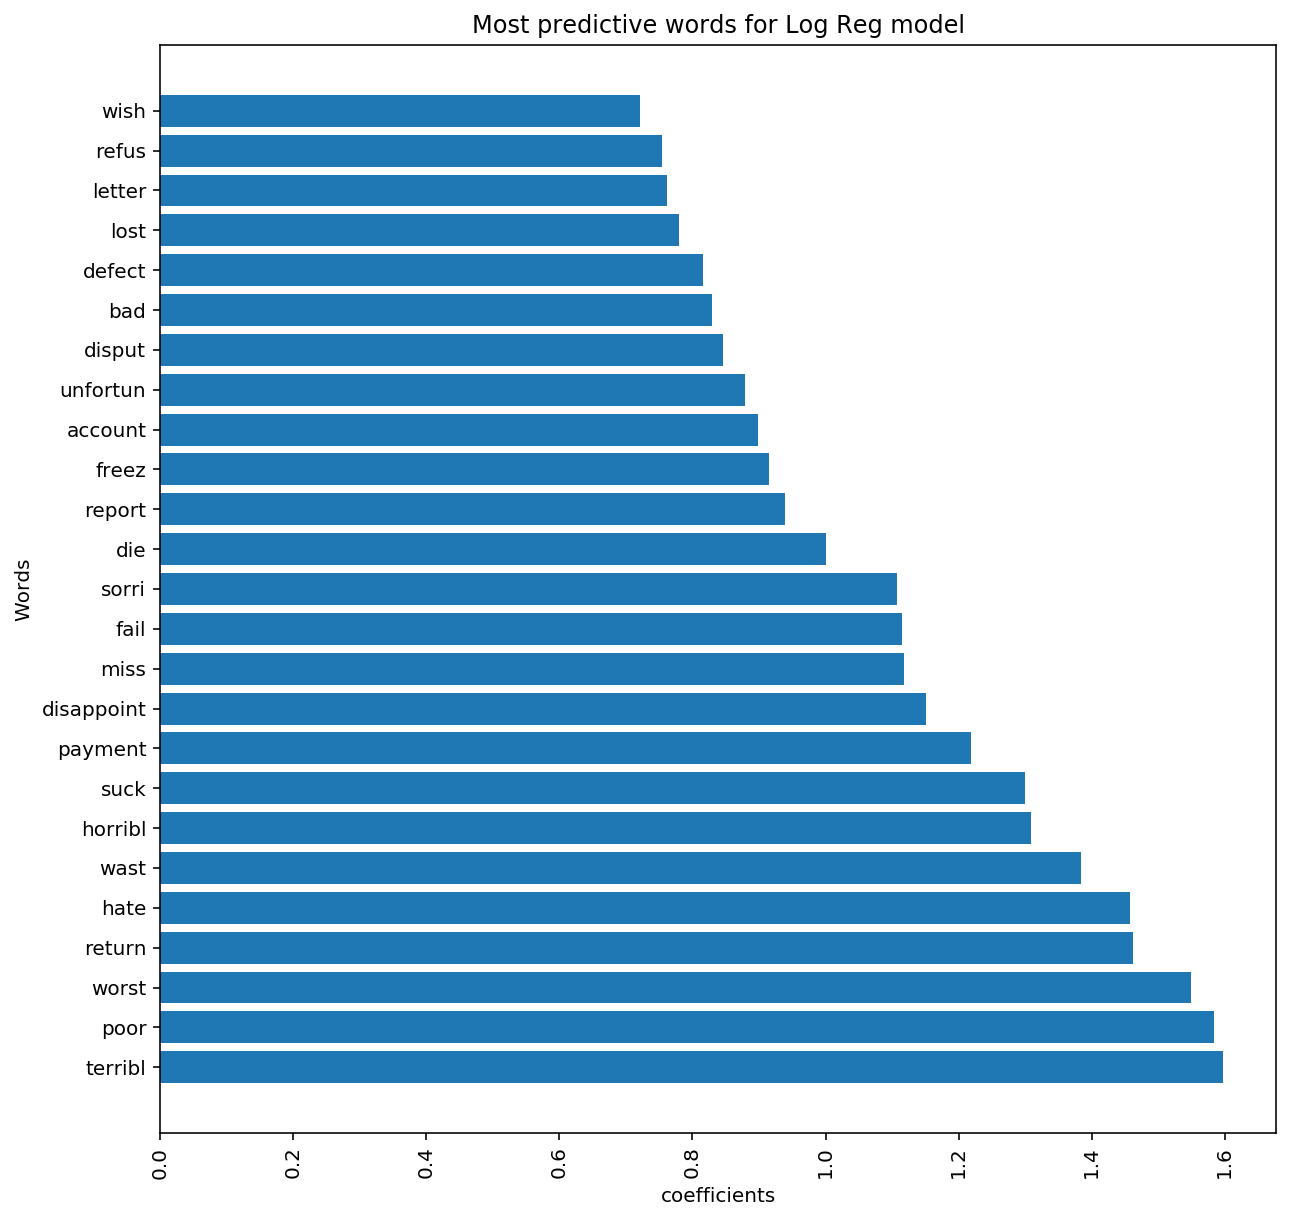

In [10]:
functions.visualize_log_reg_predictors(log_reg, X_train, 25)

## Optimized rand forest classification report on test set

In [12]:
#Predict
y_pred_rand_forest = optimized_rand_forest_grid.predict(X_test)

#print report
print(classification_report(y_test, y_pred_rand_forest))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79     15038
           1       0.80      0.76      0.78     15062

    accuracy                           0.78     30100
   macro avg       0.79      0.78      0.78     30100
weighted avg       0.79      0.78      0.78     30100



Comparison with unoptimized baseline model:

| Model |Accuracy | Precision | Recall|
| :---- | ---- | ---- | ---- |
| Unoptimized | 0.78 | 0.8 | 0.76 |
| Optimized | 0.78 | 0.8 | 0.76 |

<br>There is absoloutely no change between optimized and baseline random forest

### Log Reg Predictor words for greivance(positive class)

In [16]:
#best fit parameters
optimized_rand_forest_grid.best_estimator_

Pipeline(steps=[('model',
                 RandomForestClassifier(min_samples_leaf=5, n_estimators=400))])

In [4]:
#Load best fit
rand_forest = joblib.load('D:\\capstone_data\\trained_models\\rand_forest_best_fit.pkl')

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClas

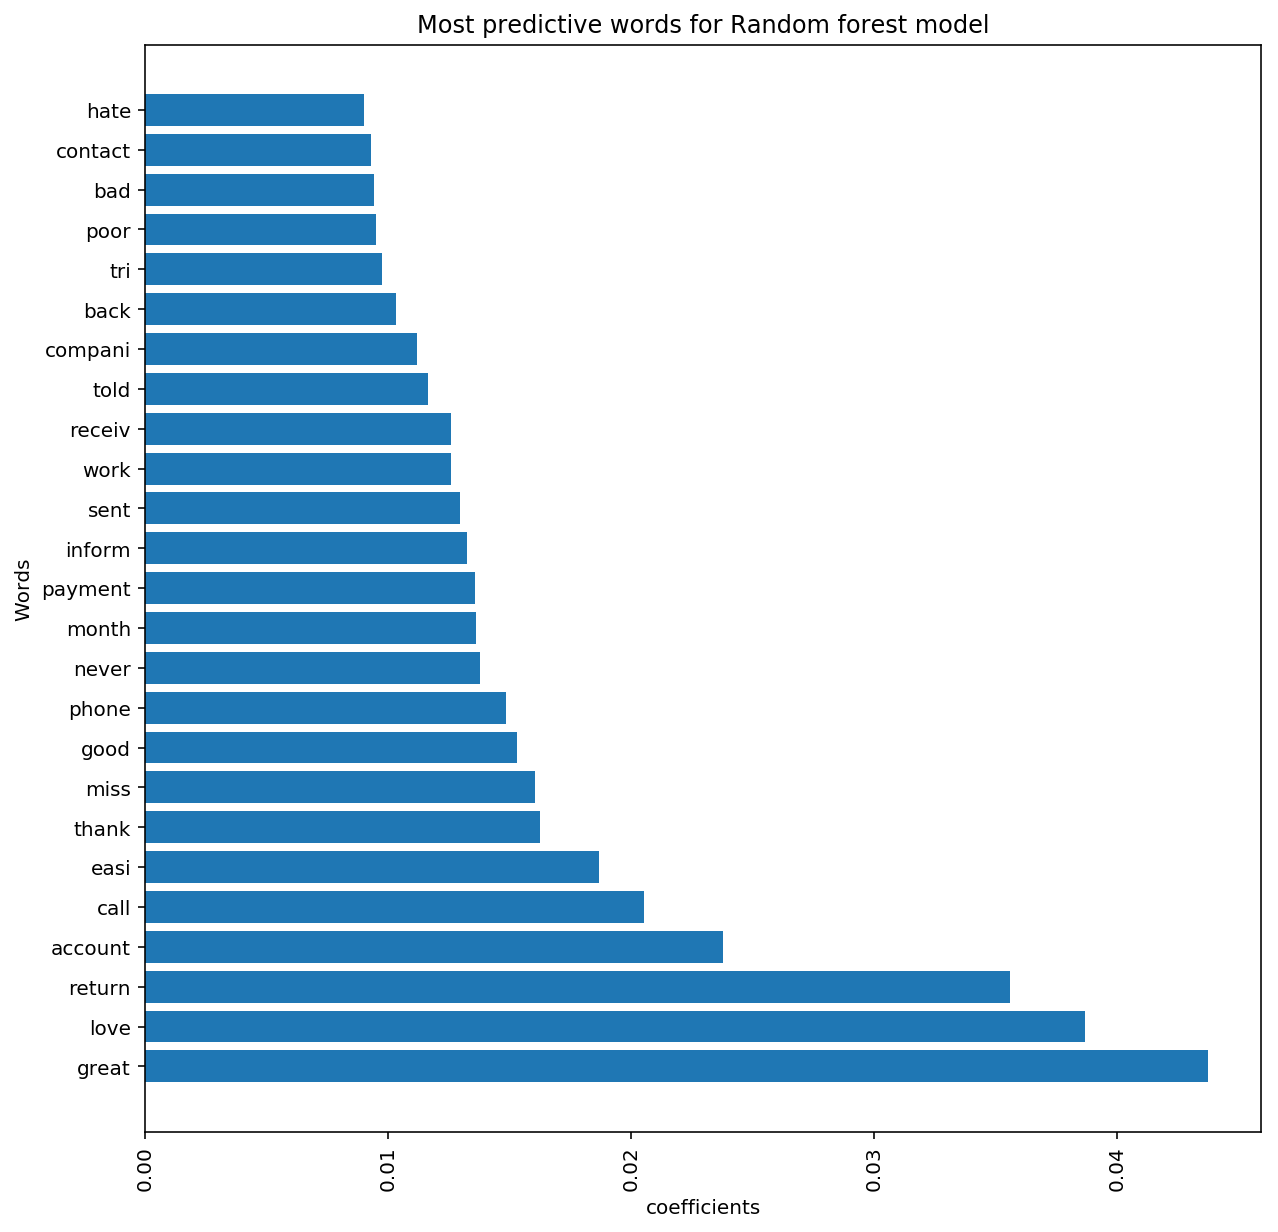

In [7]:
functions.visualize_rand_forest_predictors(rand_forest, X_train, 25)

## Verdict
Comparing the two optimized models, Logistic Regression still stands out. Although random forest does much better in precision and recall, some split words with very high coefficients like phone, call etc. indicate that it has not been able to generalize and is very sensitive to products from product review data.<br>Top Log reg predictor words for `greivance`, however are much more generalized and much more indicative of negative sentiments. Another important factor that works in favor of Logistic Regression is that, being a simple linear model, it is computationally much faster and hence some trade off in recall and f1 is accpetable.<br>It must be noted that Random forest's performance is still better and it is absoloutely worth it to try fitting random forest on a dataset that comprises of labelled tweets only and verify it's ability to generalize.

# Fit Random Forest on tweets data only

In [2]:
#Read sentiment140 tweets df
sentiment_140_df = pd.read_csv('D:\capstone_data\processed_csv\duplicates_rm\sentiment140_no_dplcts_textcol.csv')

In [18]:
#Extract a sample of 50k observations
sentiment_140_df_sm_50k = sentiment_140_df.sample(n = 150000, replace = False, random_state = 7)

In [19]:
#Verify class distribution
sentiment_140_df_sm_50k['label'].value_counts()
#Almost equal class distribution

1    75029
0    74971
Name: label, dtype: int64

In [20]:
#Verify tail
sentiment_140_df_sm_50k.tail(2)

,text,label
1341252,"love you kevin, 5909 4:06pm &lt;33",0
680102,@urbanfly heard yr boo: I think you have to get into the mind of those alcholics to answer that one #sadalcholics,1


In [21]:
#Clean data
sentiment_140_df_sm_50k_clean = functions.preclean_only(sentiment_140_df_sm_50k)

In [22]:
#Verify clean dataset
sentiment_140_df_sm_50k_clean.head()

,text,label,clean_text
353415,My grandpa just died.,1,my grandpa just died
402099,@LJLuckey I know and I'm here till 11 sucktastic,1,i know and i am here till sucktastic
304004,@CrunchyK no i didnt mean that you were married i meant that no disrespect to you if you were married!!!i was saying you had pretty eyes,1,no i didnt mean that you were married i meant that no disrespect to you if you were married i was saying you had pretty eyes
509081,@Sweets4life i wish i could have you seen it?,1,i wish i could have you seen it
1207463,happy June!! Only 17 more days,0,happy june only more days


In [23]:
#Dropping 'text' column
sentiment_140_df_sm_50k_clean.drop(columns =['text'], inplace = True)

In [24]:
#feature matrix and target vector
X = sentiment_140_df_sm_50k_clean['clean_text']
y = sentiment_140_df_sm_50k_clean['label']

In [25]:
#train test split before vectorization to avoid information being carried over to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 7)

In [26]:
#Verify
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(120000,)

(30000,)

(120000,)

(30000,)

## Vectorize

In [27]:
#Create a stemmer object and define stop words
stemmer = nltk.PorterStemmer()
ENGLISH_STOP_WORDS = stopwords.words('english')

#Custom tokenizer
def cust_tokenizer(sentence):
   # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [28]:
#Instantiate using cust_tokenizer_prods_rmvd and only words that appear in atleast 1% of documents
bagofwords = CountVectorizer(tokenizer = cust_tokenizer, 
                             min_df = 0.01, ngram_range =(1,3))
#Fit vectorizer on X_train 
bagofwords.fit(X_train)


#Transform
X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

#Check number of features in train and test
display(X_train_transformed.shape)
display(X_test_transformed.shape)

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(120000, 105)

(30000, 105)

Number of features for tweet only dataset is 105, which is approximately 1/6th of the number of features, 654, vectorized for mixed datset of same size. 

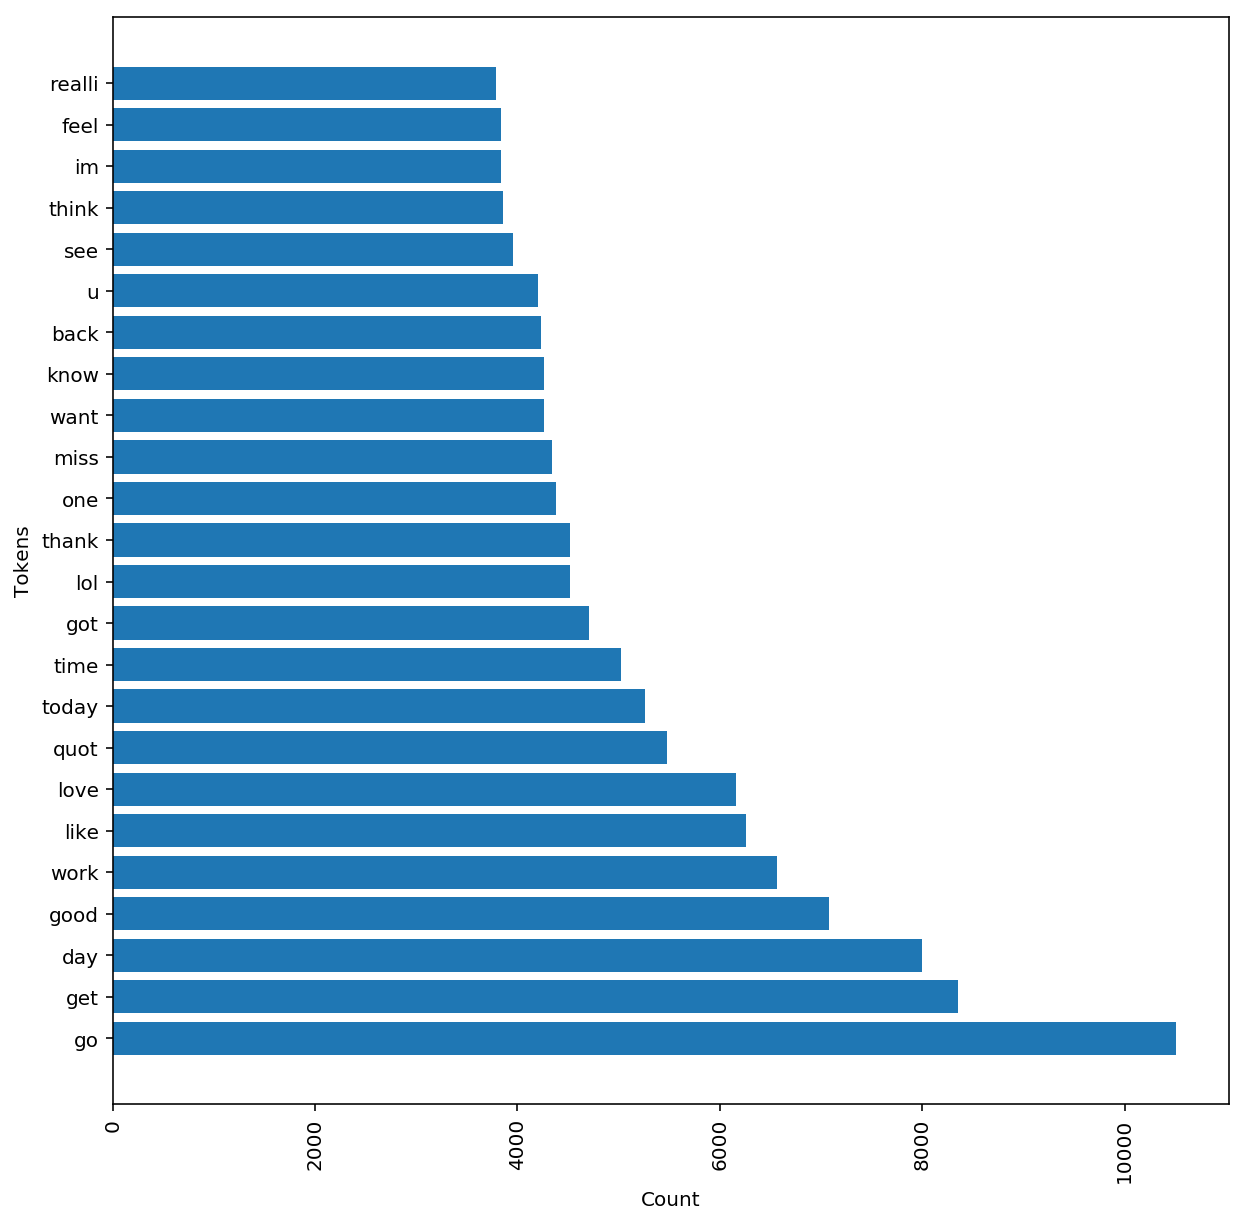

In [29]:
#Use custom function to create vectorized dataframes and visualize top words
X_train_transformed_df, X_test_transformed_df = functions.return_trnsfrmddf_visualize_words(X_train_transformed,
                                                                                           X_test_transformed,
                                                                                            bagofwords, 25)

## Fit Random Forest

In [30]:
#Fit an unoptimized random forest
rand_forest_sent140 = RandomForestClassifier()
rand_forest_sent140.fit(X_train_transformed_df, y_train)

RandomForestClassifier()

In [31]:
#Verify accuracy
print(f"The accuracy of unoptimized Random Forest on train set is: {round(rand_forest_sent140.score(X_train_transformed_df,y_train),2)}")
print(f"The accuracy of unoptimized Random Forest on train set is: {round(rand_forest_sent140.score(X_test_transformed_df,y_test),2)}")

The accuracy of unoptimized Random Forest on train set is: 0.79
The accuracy of unoptimized Random Forest on train set is: 0.65


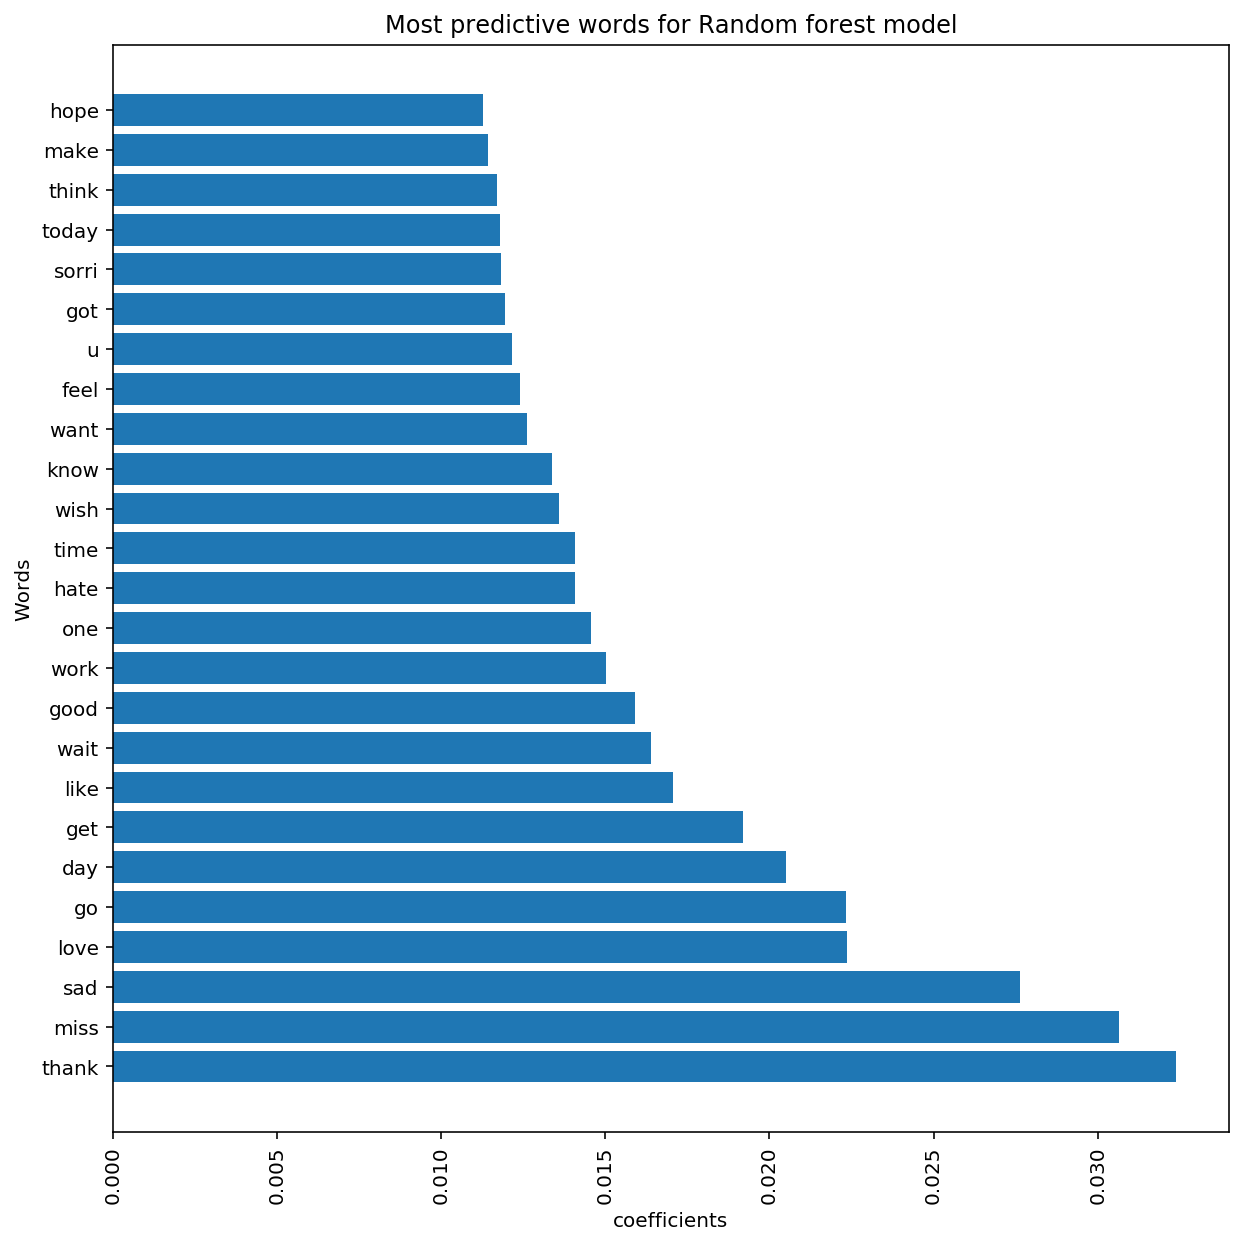

In [32]:
#Predict top words
functions.visualize_rand_forest_predictors(rand_forest_sent140, X_train_transformed_df, 25)

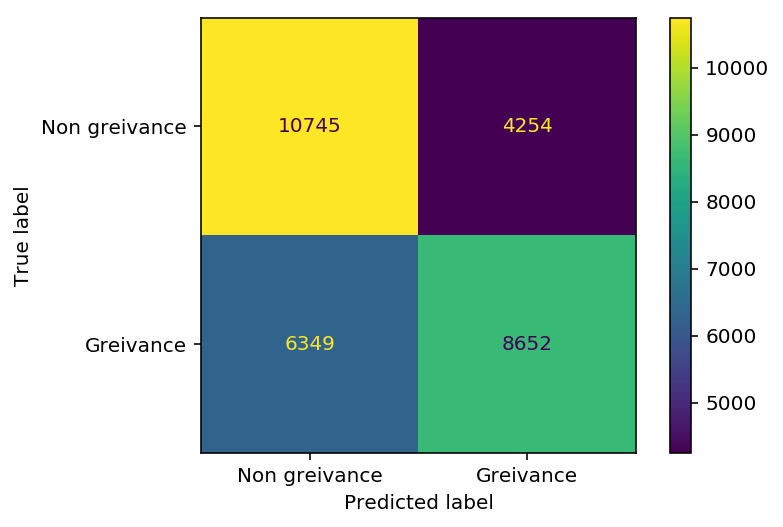

In [33]:
#Confusion matrix
y_pred_rf = rand_forest_sent140.predict(X_test_transformed_df)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)
cf_matrix

# Plot
ConfusionMatrixDisplay(cf_matrix, display_labels=['Non greivance','Greivance']).plot()
plt.show()

In [34]:
#Precision and recall
print(f"Precision score for unoptimized random forest model is: {round(precision_score(y_test, y_pred_rf),2)}")
print(f"Recall score for unoptimized random forest model is: {round(recall_score(y_test, y_pred_rf),2)}")

Precision score for unoptimized random forest model is: 0.67
Recall score for unoptimized random forest model is: 0.58


In [35]:
#F1 score
f1_score(y_test, y_pred_rf)

0.6200594832837639

# Final Conclusion

It is evident, from random forest's underperformance in every metric above, that only tweet data may not be sufficient to efficiently detect severly negative/greivance class. Also much less features for same vectorization method indicates lower variance of 'tweets only' dataset. Hence, we must used the mixed datastet i.e. tweets, complaints and review to train our model. Since, with mixed dataset, Random forest has shown a tendency to be biased towards product names and less generalized than Logistic Regression, we will choose Logistic Regression as the final model for this project. 